🎉🎂🎉 Birthday Posts Exploration 
Motivation
It’s useful for a brand to know a beauty blogger’s birthday so that they can do timely birthday-specific outreach. For example, brands can engage some of their top bloggers with gift makeup sets. 

Project
-
We would like for you to visualize and explore our social media posts data, with a focus on the posts that mention the words “my birthday.” Here are some questions to guide your exploration. There is no need to answer all or any of these questions if you want to explore the data in another way. 
How many birthday posts does a user post on average? If a user posts multiple posts, are they all clustered around a certain month or day?
How are birthday mentions different across different channels?
How many birthday mentions indicate an age? (i.e. “my 30th birthday”)
Develop a way to guess a user’s birth date (month and/or day and/or year) using this text data.
What are some common themes in these birthday posts? (Are they about cake, gifts, resolutions, or something else?)
As you begin exploring the data, remember to record your thought process and show your work in some way (i.e. Jupyter notebook, d3.js, etc). 
Data
This csv file includes social media posts from our influencer database posted between Dec 2016 and Dec 2017. (~28 MB;  ~66k posts) Tip: use pandas to open this file in python.

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [7]:
posts = pd.read_csv("birthday_posts.csv")
# convert publish_date column to date time just in case
posts['publish_date'] = pd.to_datetime(posts['publish_date'])



Notes go here


In [3]:
def birthday_thing(text):
    if "birthday" in text.lower():
        return True
    else:
        return False

In [4]:
posts[posts['user_id'] == "zoepower"]

,channel,user_id,publish_date,post_link,text
2316,PINTEREST,zoepower,2017-10-19,https://www.pinterest.com/pin/168110998574733971/,Morning folks! Im excited to say we are headin...
9265,PINTEREST,zoepower,2017-10-23,https://www.pinterest.com/pin/168110998574759832/,Hello folks! Im celebrating my birthday today ...


In [49]:
#how many BIRTHDAY posts does a USER post on average ? this means ok how many unique users, and how  



# count user ids, take the mean of a column (doesnt really matter which one)


average_birthday_posts = posts.groupby('user_id').count()['text'].mean()
print("average birthday posts per user")
print(average_birthday_posts)


#.reset_index().sort_values('text', ascending=False)['text'].mean()

# a = posts['user_id'] == "UCeeIqJdljsFxtEoQtwANFQw"
# posts[a]['text'].apply(birthday_thing)


average birthday posts per user
1.8433724993808647


array(['UCgHZj4POntWqHVyqX_Ddu2g', 'Emily_Jeffords', '478929259', ...,
       'UCe9oofjVfJzapRyVlt57x8Q', 'UCpB7xdO_3nvKS7zvqVBRaRA',
       'UCWrmYAGac9L8udJvjMn1wDw'], dtype=object)

If a user posts multiple posts, are they all clustered around a certain month or day?


In [6]:
#If a user posts multiple posts, are they all clustered around a certain month or day?
# so to predict a birthday, if a user has multiple posts they will liekly be posting w/ the birthday up UNTIL the actual birthday

def birthday_today(text):
    if "birthday" in text.lower() and "today" in text.lower():
        return True
    else:
        return False
    
bd_today = posts['text'].astype(str).apply(birthday_today)
posts[bd_today]


,channel,user_id,publish_date,post_link,text
4,PINTEREST,hhomeschooling,2017-08-21,https://www.pinterest.com/pin/426434658457849037/,Hey! It's Summer! And it's my Birthday tod...
10,INSTAGRAM,43060483,2017-07-24,https://www.instagram.com/p/BW75SA7lNkm/,August Baby!! 🔥 Order your calendar today!! 💁🏽...
16,INSTAGRAM,1957320951,2017-08-06,https://www.instagram.com/p/BXc-ecTFTYW/,✨ 25 Today. ✨ A year older. Should I also be a...
18,FACEBOOK,348428501940559,2017-08-14,https://www.facebook.com/348428501940559/posts...,Today is my birthday! And I am celebrating wit...
19,FACEBOOK,348428501940559,2017-08-14,https://www.facebook.com/348428501940559/posts...,"Today is my birthday, and I am celebrating wit..."
25,INSTAGRAM,1388121520,2017-08-01,https://www.instagram.com/p/BXQ4QdfDOP1/,My birthday nails for today. @daily_charme Aur...
35,FACEBOOK,173939949292193,2017-07-10,https://www.facebook.com/173939949292193/posts...,"Lol, it actually is my birthday today, and I h..."
56,TWITTER,317997653,2017-08-29,https://www.twitter.com/haysparkle1/status/902...,It might not be my birthday until Thursday but...
64,INSTAGRAM,196929122,2017-08-10,https://www.instagram.com/p/BXnkJRuFpho/,I can't have almonds but I can definitely try ...
66,INSTAGRAM,178650179,2017-08-03,https://www.instagram.com/p/BXVME3bBZAJ/,New post up on the blog about how I spent my b...


In [55]:
# birthday mentions by channels
# ok so i want number of unique users per channel? 
# facebook: X unique persons posts
# etc. etc. 




# posts['user_id'].unique()









posts_by_channel = posts.groupby('channel').count().reset_index().sort_values('publish_date', ascending = False)
# looks like instagram has the most birthday posts, followed by tiwtter etc etc.




# most unique users 



print("Number of posts by channel")
print(posts_by_channel)

print("Number of unique users per channel")
print(posts.groupby('channel')['user_id'].nunique())


Number of posts by channel
                                             channel  user_id  publish_date  \
2                                          INSTAGRAM    35029         35029   
5                                            TWITTER    20433         20433   
1                                           FACEBOOK     6021          6021   
4                                          PINTEREST     3380          3380   
6                                            YOUTUBE     2127          2127   
0  Dm me if you want to negotiate. https://t.co/S...        0             0   
3                Need gin for my birthday tomorrow 😢        0             0   

   post_link   text  
2      35029  35029  
5      20433  20433  
1       6021   6021  
4       3380   3380  
6       2127   2127  
0          0      0  
3          0      0  
Number of unique users per channel
channel
Dm me if you want to negotiate. https://t.co/SYx4Eu…        0
FACEBOOK                                                 37

What are some common themes in these birthday posts? (Are they about cake, gifts, resolutions, or something else?) 
how to figure out common themes, hash each word longer than idk 3 letters?   
yes very "common" words that pop out in these posts 


Develop a way to guess a user’s birth date (month and/or day and/or year) using this text data.

easy enough within a month, a user will likely not talk about the birthday unless its within a few weeks.. i hope
within a day - if a user posts multiple times, then the last post is likely the birthday or CLOSE to the birthday.
 
 so basically 1 - aggregate data per user id in some way.
  and then start reading the text and publish date.
  
  based on "data" guess the birthday
  
  so a user will have
  1- a list of publish dates
  each publish date will be paired w/ a text
  2- a list of texts
  3- a platform/channel that the post on
      - 
      
      so based on certain phrases, add (or possibly subtract) from the date.
      
      from there "make a prediction"... based on a list of dates that have been... modified? 
  
 strategy - for a user, apply function that analyzes data and returns a best guess
 
at each iteration 

    case 1 - date, nothing that i can take from the text
        if theres a later date, simply use the latest date and assume its the birthday post. 
        
    case 2 - date, something that might indicate a date (in X days .. etc) 
        ways to predict a date from text
        
        in X days <- how to parse this? 
    
    in [a-zA-Z\d]+ days   might need a numword dictionary to the the change. i should run this on data and see how many ppl mention.
    
    in [a-zA-Z\d]+ days
    
    **** UNTIL MY BIRTHDAY 
    since these posts all have my birthday, can look at the locality around the word birthday specifically also these ppl likely to be basic or sthn
    


In [8]:
# test zone
# find posts with in X days e.g.

# iterate thru list of users


unique_users = posts['user_id'].unique()

b = posts[posts['user_id']== unique_users[0]]['text']


def process_text(text, user_data):
    a = 5

def in_x_days(text, user_thing):

    for match in re.finditer('birthday in [a-zA-Z\d]+ days', text):
        user_thing.append(match.group(0))
    
    
# somesthing about users to in X days 

users_birthday = {};
    
for user in unique_users:
    users_birthday[user] = []
    user_row = posts[posts['user_id']== user]['text']
    for text in user_row:
#         process_text(text, users_birthday[user])
        in_x_days(text, users_birthday[user])
    if not users_birthday[user]:
        del users_birthday[user]


        
print(users_birthday)
        
    
# for user in unique_users:
#     posts[]
# posts['user_id' ]


    

    
    # setup a dictionary if needbe
    # how to capture a section in between
    
    
    
#
    
    
    
    
    



{'81081722': ['birthday in 27 days'], '35859948': ['birthday in 4 days'], '21425482': ['birthday in 10 days'], '749515226': ['birthday in 4 days'], '383748949': ['birthday in 2 days'], '135977853': ['birthday in 4 days'], '1048447986': ['birthday in two days'], '101745805212': ['birthday in 2 days'], '2032468550': ['birthday in 14 days'], '2362734185': ['birthday in 5 days'], '376069472': ['birthday in 12 days'], '2267984659': ['birthday in three days'], '3303711539': ['birthday in 4 days'], '24042195': ['birthday in 2 days'], '79183155': ['birthday in 23 days'], '394635836': ['birthday in 6 days'], '222645578': ['birthday in 8 days'], '1513432386': ['birthday in 3 days'], '19462943': ['birthday in 2 days'], '20574145': ['birthday in 28 days'], '676997554': ['birthday in few days'], '211404613': ['birthday in 5 days'], '48702012': ['birthday in 3 days'], '1227536726': ['birthday in three days'], '3004207840': ['birthday in two days'], '15980786': ['birthday in 6 days'], '732264590': ['

In [58]:
# for user in users_birthday:
#     print(users_birthday[user])

In [19]:
# another playground for the birthday prediction
# so for each post a user has, create an update? 





"""
objective - predicting a user's birthday
input: pandas dataframe
output: a dictionary-  key: user_id, value: birthdate

# strategy -
    1 iterate thru list of unique users
        for all posts of a user:
            account for the post date column, and the text
            use the last date of a post as "initial guess"
            update initial guess based on "in x days" or in "in x weeks" etc. 
            
    

    
    
    base line birthday temporallocality - 
    based on last post's date.
    
    
    
    of these, if theres an in X day th
    
    
    users_birthday = {};
    
for user in unique_users:
    users_birthday[user] = []
    user_row = posts[posts['user_id']== user]['text']
    for text in user_row:
      process_text(text, users_birthday[user])
        in_x_days(text, users_birthday[user])
    if not users_birthday[user]:
        del users_birthday[user]


        
    

"""

def analyze_text(date, text): # returns a list of predicted birthdays based on text and publish date
    # iF TEXT MATCHES "NOT MY BIRTHDAY" - kill analyze text, return "not a valid birthday thingy.  
    not_bday_pattern = re.compile("(not my birthday)")
    if not_bday_pattern.match(text):
        return False
    
    "birthday in [a-zA-Z\d]+ day"
    "birthday in [a-zA-Z\d]+ month"
    "birthday in couple of days"
    
    
    
    # match for my birthday today
    # was my birthday
    # my birthday in X days
    # my birthday in X weeks
    # my birthday a X ago
    # my birthday X days ago
    for match in re.finditer('birthday in [a-zA-Z\d]+ days', text):
        



def predict_birthdays(users):
    
    
    
    
    user_birthday = {}

    
    
    for user in users:
        users_birthday[user] = []
        user_posts = posts[posts['user_id']==user] #every user post
        initial_guess = False
        text_based_guess = False 
        for post in user_posts:
            
            date = post['publish_date']
            if (initial_guess):
                if date > initial_guess:
                    initial_guess = date
            else:
                initial_guess = date
            
            text_guess = analyze_text(date, text)
            
            
            
            
            
            
            set/update initial guess
            analyze_post(post)
            # should i keep a seperate thing for text analysis?

    return
        
        
    
unique_users = posts['user_id'].unique()
predicted_user_birthdays = predict_birthdays(users)

    
    





IndentationError: expected an indented block (<ipython-input-19-bcd3eb33f3a9>, line 71)

In [16]:
# date testing



date1 = posts[:1]['publish_date'][0]
date2 = posts[2:5]['publish_date'][3]


print(date1) 
print(date2)
date2>date1

2017-07-23 00:00:00
2017-08-07 00:00:00


True

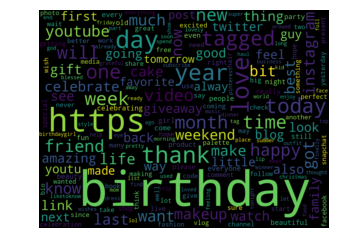

In [18]:
# get all the text.
# wordcloud2 = WordCloud().generate(' '.join(text2['Crime Type'])), which would concatenate all words in your dataframe column and then count all instances.

concatenated_text = ' '.join(posts['text'].astype(str)).lower()

cloud = WordCloud(width = 800, height = 600, min_font_size=8, collocations =False).generate(concatenated_text)
for key in list(cloud.words_.keys()):
    if len(key) <= 2:
        del cloud.words_[key]
        
cloud2 = WordCloud(width = 1600, height = 1200, min_font_size=20).fit_words(cloud.words_)    

plt.imshow(cloud2, interpolation='bilinear')
plt.axis("off")
         
cloud2.to_file("cloud2.png")

plt.show()



In [19]:
a = ' '.join(posts['text'].astype(str))
